In [1]:
%reset -f
import sympy as sp

In [2]:
L = sp.S(6)
a = sp.S(2)
b = sp.S(2)
c = L - a - b
q1 = sp.S(5)
q2 = sp.S(0)
q3 = sp.S(0)
F = sp.S(15)

In [3]:
Bv = (q1*a*a/2+F*(a+b))/(a+b+c)
display(Bv)
H = Bv*c*5/4
display(H)
display(H.evalf())

35/3

175/6

29.1666666666667

In [4]:
H, x= sp.symbols('H x')
C1, C2, C3, C4, C5, C6 = sp.symbols('C1 C2 C3 C4 C5 C6')
z1, z2, z3 = sp.symbols('z1 z2 z3',cls=sp.Function)
ODE1 = sp.Eq(H * sp.diff(z1(x),x,2) , -q1)
ODE2 = sp.Eq(H * sp.diff(z2(x),x,2) , -q2)
ODE3 = sp.Eq(H * sp.diff(z3(x),x,2) , -q3)
sol = sp.dsolve([ODE1,ODE2,ODE3],[z1(x),z2(x),z3(x)])
z1 = sol[0].rhs
z2 = sol[1].rhs
z3 = sol[2].rhs

V1 = H * sp.diff(z1,x)
V2 = H * sp.diff(z2,x)
V3 = H * sp.diff(z3,x)

eq1 = sp.Eq(z1.subs(x,0),0)
eq2 = sp.Eq(z3.subs(x,L),0)
eq3 = sp.Eq(z1.subs(x,a),z2.subs(x,a))
eq4 = sp.Eq(V1.subs(x,a),V2.subs(x,b))
eq5 = sp.Eq(z2.subs(x,a+b),z3.subs(x,a+b))
eq6 = sp.Eq(V2.subs(x,a+b),V3.subs(x,a+b)+F)

sol = sp.solve([eq1,eq2,eq3,eq4,eq5,eq6],[C1,C2,C3,C4,C5,C6])
z1 = z1.subs(sol)
z2 = z2.subs(sol)
z3 = z3.subs(sol)
display(z1)
display(z2)
display(z3)

-5*x**2/(2*H) + 40*x/(3*H)

10*x/(3*H) + 10/H

-35*x/(3*H) + 70/H

exact

In [5]:
ds1 = sp.sqrt(1+sp.diff(z1,x)**2)
ds2 = sp.sqrt(1+sp.diff(z2,x)**2)
ds3 = sp.sqrt(1+sp.diff(z3,x)**2)

Taylor option 1

In [6]:
#ds1 = 1 + sp.diff(z1,x)**2/2
#ds2 = 1 + sp.diff(z2,x)**2/2
#ds3 = 1 + sp.diff(z3,x)**2/2

Taylor option 1

In [7]:
#ds1 = 1 + sp.diff(z1,x)**2/2 - sp.diff(z1,x)**4/8
#ds2 = 1 + sp.diff(z2,x)**2/2 - sp.diff(z2,x)**4/8
#ds3 = 1 + sp.diff(z3,x)**2/2 - sp.diff(z3,x)**4/8

Length of cable

In [10]:
LL = sp.integrate(ds1.subs(H,sp.S(175/6)),(x,sp.S(0),a))+sp.integrate(ds2.subs(H,sp.S(175/6)),(x,a,b))+sp.integrate(ds3.subs(H,sp.S(175/6)),(x,b,L))
display(LL)
eq7 = sp.Eq(sp.integrate(ds1,(x,0,a))+sp.integrate(ds2,(x,a,b))+sp.integrate(ds3,(x,b,L)),LL)
H_sol = sp.nsolve(eq7,H,30)
H_sol

6.39684931060322

29.1666666666667

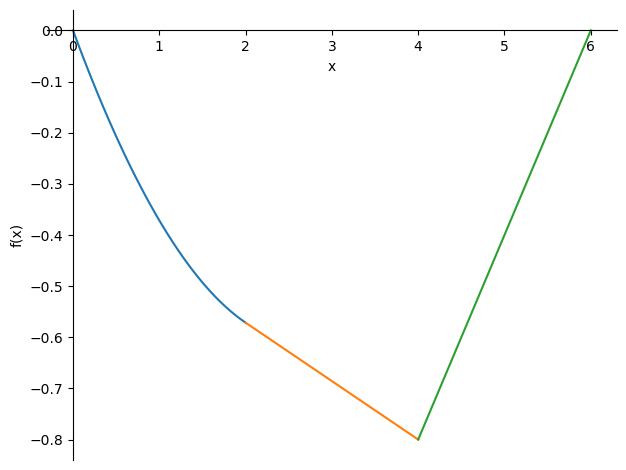

In [11]:
z1_sol = z1.subs(H,H_sol)
z2_sol = z2.subs(H,H_sol)
z3_sol = z3.subs(H,H_sol)
sp.plot((-z1_sol,(x,0,a)),(-z2_sol,(x,a,a+b)),(-z3_sol,(x,a+b,L)));

Alternative

In [12]:
%reset -f
import sympy as sp

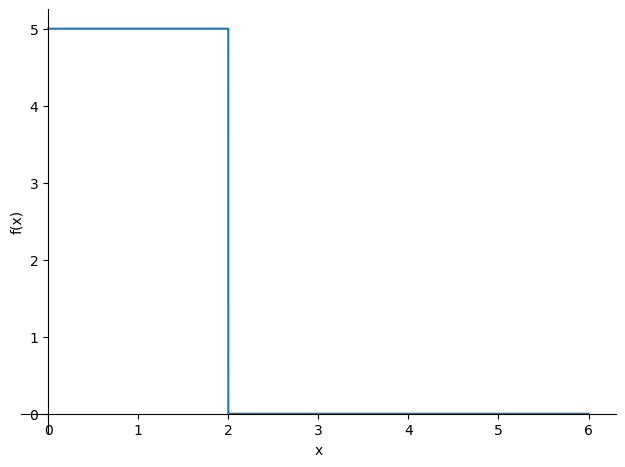

25.0000000000000

In [13]:
L = sp.S(6)
a = sp.S(2)
b = sp.S(2)
c = L - a - b
F = sp.S(15)
q0 = sp.S(5)

H, x= sp.symbols('H x')
C1, C2 = sp.symbols('C1 C2')
z = sp.symbols('z',cls=sp.Function)

q = q0*(sp.S(1)-sp.Heaviside(x-a))+F*sp.DiracDelta(x-(a+b))
sp.plot(q,(x,0,L))
sp.integrate(q,(x,0,L)).evalf()

In [14]:
ODE = sp.Eq(H * sp.diff(z(x),x,2) , -q)
sol = sp.dsolve(ODE,z(x))
z = sol.rhs

V = H * sp.diff(z,x)

eq1 = sp.Eq(z.subs(x,0),0)
eq2 = sp.Eq(z.subs(x,L),0)

sol = sp.solve([eq1,eq2,],[C1,C2])
z = z.subs(sol)



In [15]:
eq3 = sp.Eq(z.subs(x,a+b),sp.S(0.8))
H_sol = sp.nsolve(eq3,H,30)
display(H_sol)

29.1666666666667

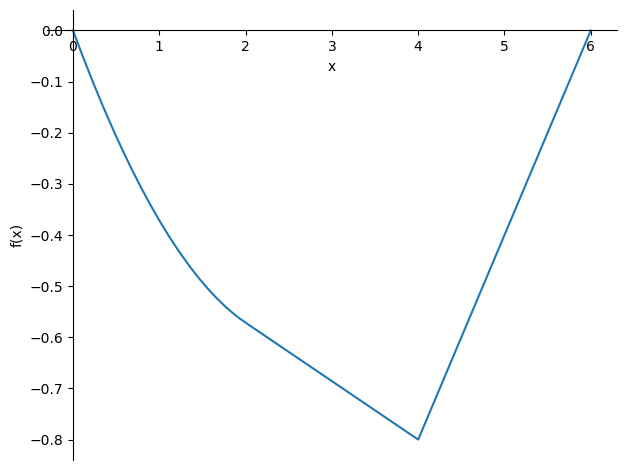

In [16]:
z_sol = z.subs(H,H_sol)
sp.plot(-z_sol,(x,0,L))

In [ ]:
ds = sp.sqrt(1+sp.diff(z.subs(H,sp.S(175/6)),x)**2)
LL = sp.integrate(ds,(x,0,L))
display(LL)